<a href="https://colab.research.google.com/github/minjung21/Final-Team9/blob/main/%EB%A9%8B%EC%82%AC_%ED%8C%8C%EC%9D%B4%EB%84%90_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_20250925.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
from scipy import stats
import seaborn as sns

In [14]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [15]:
df = pd.read_csv('/content/movies_genres_ohe.csv')

In [16]:
# 2) 장르 컬럼만 자동으로 추출
non_genre_cols = [
    'id','title','vote_average','vote_count','status','release_date',
    'revenue','runtime','adult','budget','popularity','keywords','y_result'
]
genre_cols = [c for c in df.columns if c not in non_genre_cols]

# 3) 각 장르별 평균 y_result 계산
genre_means = {}
for genre in genre_cols:
    mask = df[genre] == 1
    if mask.sum() > 0:
        genre_means[genre] = df.loc[mask, 'y_result'].mean()

# 4) 평균 y_result 높은 순으로 정렬
genre_means = pd.Series(genre_means).sort_values(ascending=False)

# 5) 결과 출력
print("장르별 평균 y_result (흥행 점수):")
print(genre_means)


장르별 평균 y_result (흥행 점수):
Animation          1.464819
Family             1.412865
Adventure          1.365772
Fantasy            1.294189
Action             1.240660
Comedy             1.236967
Science Fiction    1.220090
SR                 1.205706
Horror             1.204545
Romance            1.189480
Music              1.152866
Documentary        1.144578
Mystery            1.129577
Thriller           1.129372
Crime              1.096169
War                1.085106
Drama              1.034817
Western            0.967105
History            0.896104
TV Movie           0.571429
dtype: float64


In [17]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

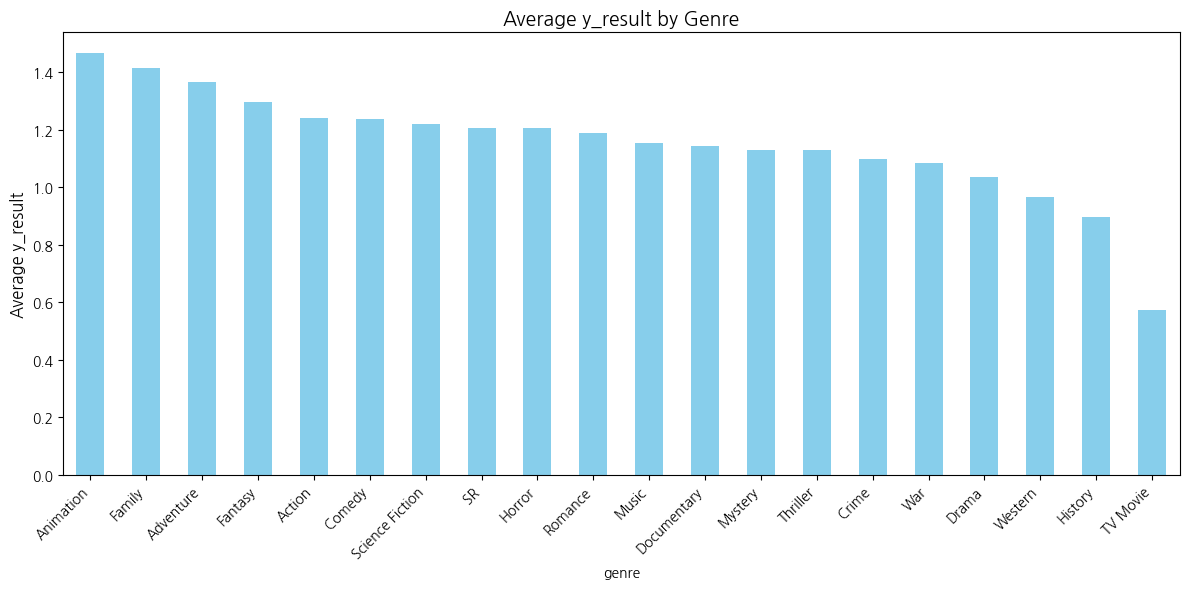

In [20]:
# 6) 그래프로 시각화
plt.figure(figsize=(12,6))
genre_means.plot(kind='bar', color='skyblue')
plt.title('Average y_result by Genre', fontsize=14)
plt.ylabel('Average y_result', fontsize=12)
plt.xlabel('genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:
# Install a Korean font
!apt-get update -qq
!apt-get install fonts-nanum -qq

# Configure matplotlib to use the new font
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# Rebuild the font cache
fm.fontManager.findfont('NanumGothic', rebuild_if_missing=True)

print("Font setup complete. Please re-run the plotting cells.")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126441 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
Font setup complete. Please re-run the plotting cells.


In [7]:
groups = []
labels = []
for genre in genre_cols:
    mask = df[genre] == 1
    if mask.sum() > 0:
        groups.append(df.loc[mask, 'y_result'])
        labels.append(genre)

# 1) 정규성 검사 (Shapiro-Wilk)
print("=== Shapiro-Wilk normality test per group ===")
for label, data in zip(labels, groups):
    if len(data) >= 3:
        stat, p = stats.shapiro(data)
        print(f"{label:20s} W-stat={stat:.3f}, p={p:.3f}")
    else:
        print(f"{label:20s} (Too few samples for Shapiro test)")

# 2) 등분산성 검사 (Levene test)
stat, p = stats.levene(*groups)
print("\n=== Levene’s test for equal variances ===")
print(f"Levene stat={stat:.3f}, p={p:.3f}")

=== Shapiro-Wilk normality test per group ===
SR                   W-stat=0.496, p=0.000
Action               W-stat=0.851, p=0.000
Adventure            W-stat=0.854, p=0.000
Animation            W-stat=0.841, p=0.000
Comedy               W-stat=0.861, p=0.000
Crime                W-stat=0.846, p=0.000
Documentary          W-stat=0.798, p=0.000
Drama                W-stat=0.835, p=0.000
Family               W-stat=0.863, p=0.000
Fantasy              W-stat=0.850, p=0.000
History              W-stat=0.801, p=0.000
Horror               W-stat=0.856, p=0.000
Music                W-stat=0.854, p=0.000
Mystery              W-stat=0.840, p=0.000
Romance              W-stat=0.860, p=0.000
Science Fiction      W-stat=0.849, p=0.000
TV Movie             W-stat=0.769, p=0.020
Thriller             W-stat=0.844, p=0.000
War                  W-stat=0.845, p=0.000
Western              W-stat=0.832, p=0.000

=== Levene’s test for equal variances ===
Levene stat=43.300, p=0.000


**Shapiro–Wilk 정규성 검정 결과**

각 장르별로 W-stat과 p값이 나왔습니다.

해석 기준: p ≥ 0.05 → 정규성 충족(정규분포라고 볼 수 있음)

p < 0.05 → 정규성 가정 위반(정규분포 아님)

결과에서 거의 모든 장르가 p=0.000 (또는 매우 작은 값)이 나왔죠.
→ 대부분의 장르별 y_result 분포가 정규분포가 아니라고 판단됩니다.

---

**Levene’s 등분산성 검정 결과**

해석 기준: p ≥ 0.05 → 등분산성 충족(분산이 같다)

p < 0.05 → 등분산성 위반(분산이 다르다)

결과: Levene stat=43.300, p=0.000
→ 집단(장르) 간 분산이 서로 다르다고 판단됩니다.

---

**결론**

정규성 위반

등분산성 위반

따라서 고전적 ANOVA(모수적)보다는
**비모수적 검정(Kruskal–Wallis test)**을 사용하는 것이 적합합니다.

Kruskal–Wallis는 집단 수가 3개 이상인 경우에 ANOVA의 비모수 대안으로 자주 사용돼요.
(순위 기반으로 집단 간 차이를 검정하므로 정규성·등분산성을 가정하지 않음)

In [8]:
h_stat, p_val = stats.kruskal(*groups)

print("Kruskal–Wallis H-statistic:", h_stat)
print("p-value:", p_val)

Kruskal–Wallis H-statistic: 278.5801828420302
p-value: 4.7964935899304114e-48


**Kruskal–Wallis 검정 결과**

검정통계량 H: 집단(장르) 간 순위 차이를 나타냄. 값이 클수록 차이가 큼.

p-value ≈ 4.8e-48: 0.05보다 훨씬 작음.
→ 귀무가설(모든 집단의 분포가 동일하다)을 기각.

즉, 장르별로 y_result 분포가 통계적으로 유의미하게 다르다는 결론을 내릴 수 있습니다.

In [9]:
# Dunn's test

!pip install scikit-posthocs

import scikit_posthocs as sp
import pandas as pd

df_long = []

for genre in genre_cols:
    mask = df[genre] == 1
    if mask.sum() > 0:
        temp = df.loc[mask, ['y_result']].copy()
        temp['genre'] = genre
        df_long.append(temp)

df_long = pd.concat(df_long, axis=0)

# Dunn’s test 수행 (p-value Holm 보정)
dunn_results = sp.posthoc_dunn(df_long, val_col='y_result', group_col='genre', p_adjust='holm')

print(dunn_results)

                       Action     Adventure     Animation        Comedy  \
Action           1.000000e+00  1.070426e-01  2.015058e-02  1.000000e+00   
Adventure        1.070426e-01  1.000000e+00  1.000000e+00  1.215699e-01   
Animation        2.015058e-02  1.000000e+00  1.000000e+00  2.518274e-02   
Comedy           1.000000e+00  1.215699e-01  2.518274e-02  1.000000e+00   
Crime            4.356416e-02  4.034888e-08  3.899652e-07  6.758559e-03   
Documentary      1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
Drama            7.848933e-10  6.467022e-21  7.780984e-13  1.200042e-13   
Family           7.486651e-03  1.000000e+00  1.000000e+00  8.397877e-03   
Fantasy          1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
History          1.663657e-08  8.716219e-15  1.465282e-13  1.479367e-09   
Horror           1.000000e+00  1.837008e-01  2.217186e-02  1.000000e+00   
Music            1.000000e+00  3.349404e-01  3.472831e-02  1.000000e+00   
Mystery          1.000000

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from itertools import combinations

genre_combinations = list(combinations(genre_cols, 2))

for col in genre_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(lambda x: 1 if str(x).lower() in ['1', 'true', 'yes'] else 0)
    df[col] = df[col].astype(int)

genre_combinations = list(combinations(genre_cols, 2))

for genre1, genre2 in genre_combinations:
    combo_name = f"{genre1}_{genre2}"
    df[combo_name] = df[genre1] * df[genre2]

X = df[genre_cols + [f"{g1}_{g2}" for g1, g2 in genre_combinations]]
y = df['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R²: {r2}')

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coefficients = coefficients.sort_values('Coefficient', ascending=False)
print("가장 흥행에 긍정적인 영향을 주는 상위 10개 장르/장르 조합:")
print(coefficients.head(10))

MSE: 1.83629429597366e+16
R²: 0.40294288977268466
가장 흥행에 긍정적인 영향을 주는 상위 10개 장르/장르 조합:
                   Feature   Coefficient
531             Horror_War  1.818230e+08
529        Horror_TV Movie  1.438091e+08
542       Mystery_TV Movie  1.438091e+08
521       History_TV Movie  1.438091e+08
429       Animation_Family  1.361443e+08
427  Animation_Documentary  1.145918e+08
425       Animation_Comedy  1.066660e+08
512       Fantasy_TV Movie  7.181570e+07
502        Family_TV Movie  7.181570e+07
452        Comedy_TV Movie  7.181570e+07


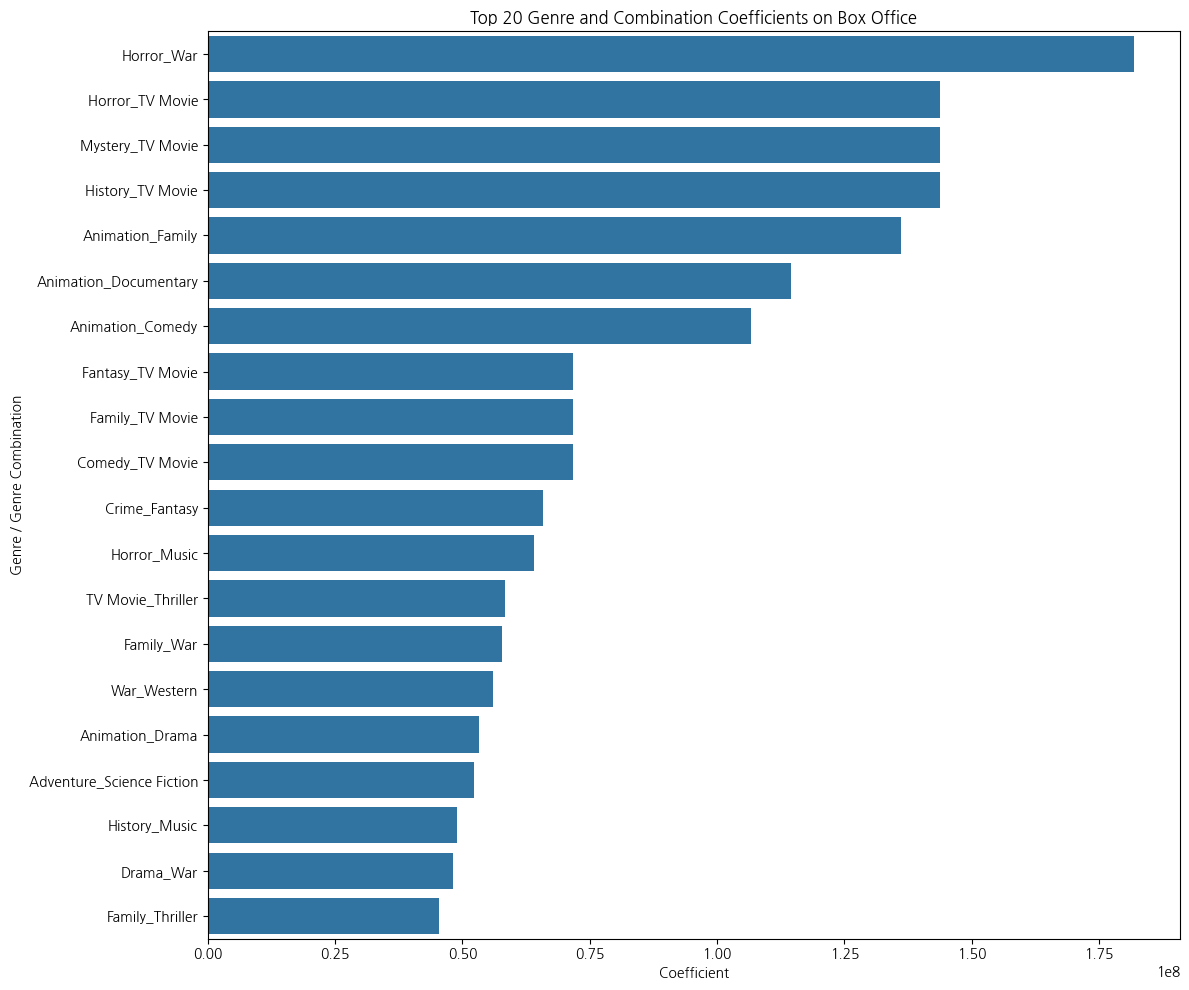

In [21]:
plt.figure(figsize=(12, 10))
top20 = coefficients.head(20)

sns.barplot(x='Coefficient', y='Feature', data=top20)

plt.title('Top 20 Genre and Combination Coefficients on Box Office')
plt.xlabel('Coefficient')
plt.ylabel('Genre / Genre Combination')
plt.tight_layout()
plt.show()

In [ ]:
tv_movie_movies = df[df['TV Movie'] == 1]

other_genres = [g for g in genre_cols if g != 'TV Movie']
tv_movie_only = tv_movie_movies[(tv_movie_movies[other_genres].sum(axis=1)) == 0]

tv_movie_combo = tv_movie_movies[(tv_movie_movies[other_genres].sum(axis=1)) > 0]

print("TV Movie 단독 영화:")
print(tv_movie_only[['title', 'revenue', 'y_result']])

print("\nTV Movie + 다른 장르 영화:")
print(tv_movie_combo[['title', 'revenue', 'y_result']])

TV Movie 단독 영화:
Empty DataFrame
Columns: [title, revenue, y_result]
Index: []

TV Movie + 다른 장르 영화:
                           title   revenue  y_result
4747  Stargate: The Ark of Truth   8900000         1
5996                  Doctor Who  42000000         2
7375              The Black Hole   3500000         0
8120        Navigating the Heart   5000000         1


In [ ]:
tv_movie_combo = df[df['TV Movie'] == 1]

other_genres = [g for g in genre_cols if g != 'TV Movie']

def get_combined_genres(row):
    return [g for g in other_genres if row[g] == 1]

tv_movie_combo['combined_genres'] = tv_movie_combo.apply(get_combined_genres, axis=1)

print(tv_movie_combo[['title', 'revenue', 'y_result', 'combined_genres']])

                           title   revenue  y_result  \
4747  Stargate: The Ark of Truth   8900000         1   
5996                  Doctor Who  42000000         2   
6080     Monster High: The Movie      5000         0   
7375              The Black Hole   3500000         0   
8059                Black Friday       500         0   
8120        Navigating the Heart   5000000         1   
8215          Codename Hanuman X    100000         0   

                                        combined_genres  
4747               [Action, Adventure, Science Fiction]  
5996                       [Adventure, Science Fiction]  
6080        [Adventure, Comedy, Family, Fantasy, Music]  
7375                        [Science Fiction, Thriller]  
8059                           [Crime, Drama, Thriller]  
8120                                   [Drama, Romance]  
8215  [Action, Adventure, Comedy, Drama, Family, Fan...  


/tmp/ipython-input-684250733.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tv_movie_combo['combined_genres'] = tv_movie_combo.apply(get_combined_genres, axis=1)
/tmp/ipython-input-684250733.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_movie_combo['combined_genres'] = tv_movie_combo.apply(get_combined_genres, axis=1)
